Graph successfully loaded with 1461 nodes and 2742 edges.


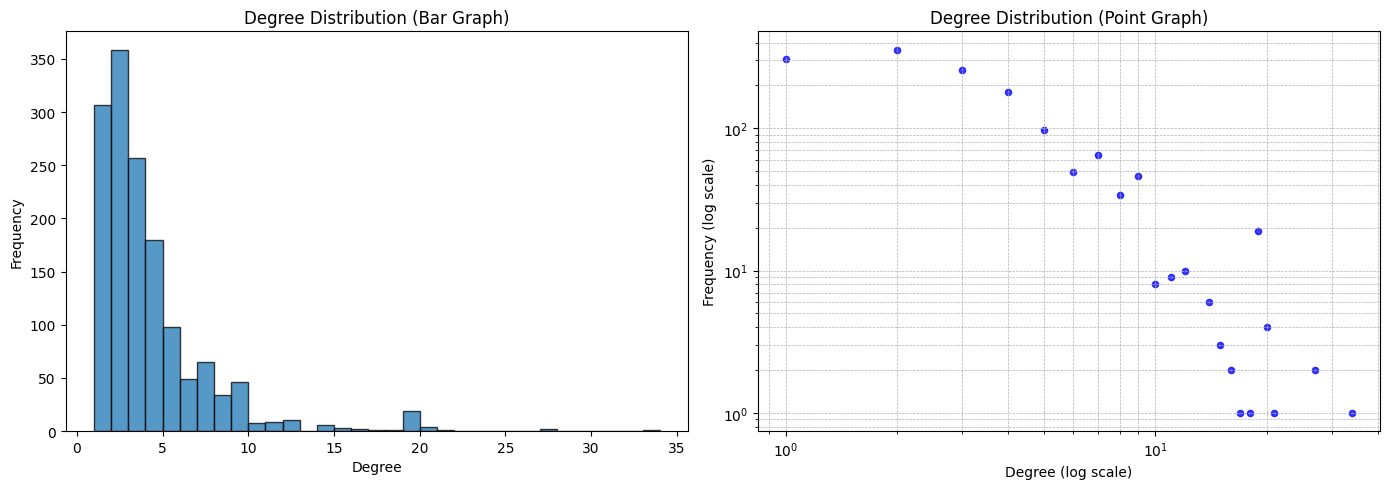

Max Degree: 34
Min Degree: 1
Average Degree: 3.75
Standard Deviation: 3.46


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

file_path = r"/Users/harshil/SNUC_Subjects/Sem 6/SNA/SNA - Network Science/out.dimacs10-netscience"

# Read the file while ignoring comment lines
with open(file_path, "r") as f:
    lines = [line.strip() for line in f if not line.startswith("%")]

# Create a graph
G = nx.parse_edgelist(lines, nodetype=int)  # Ensure nodes are integers

print("Graph successfully loaded with", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges.")

# Compute degree distribution
degrees = [d for _, d in G.degree()]
unique_degrees, counts = np.unique(degrees, return_counts=True)  # Unique degrees and their frequencies

# ------------------------- PLOT: Degree Distribution ------------------------- #
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create two side-by-side plots

# **Left Plot: Histogram (Bar Graph)**
axes[0].hist(degrees, bins=range(min(degrees), max(degrees) + 1), edgecolor="black", alpha=0.75)
axes[0].set_xlabel("Degree")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Degree Distribution (Bar Graph)")

# **Right Plot: Scatter Plot (Point Graph)**
axes[1].scatter(unique_degrees, counts, color="blue", alpha=0.75, s=20)
axes[1].set_xscale("log")  # Log scale for better visualization
axes[1].set_yscale("log")
axes[1].set_xlabel("Degree (log scale)")
axes[1].set_ylabel("Frequency (log scale)")
axes[1].set_title("Degree Distribution (Point Graph)")
axes[1].grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Degree Statistics
max_degree = max(degrees)
min_degree = min(degrees)
average_degree = np.mean(degrees)
std_dev_degree = np.std(degrees)

print(f"Max Degree: {max_degree}")
print(f"Min Degree: {min_degree}")
print(f"Average Degree: {average_degree:.2f}")
print(f"Standard Deviation: {std_dev_degree:.2f}")


In [60]:
pip install --upgrade networkx matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


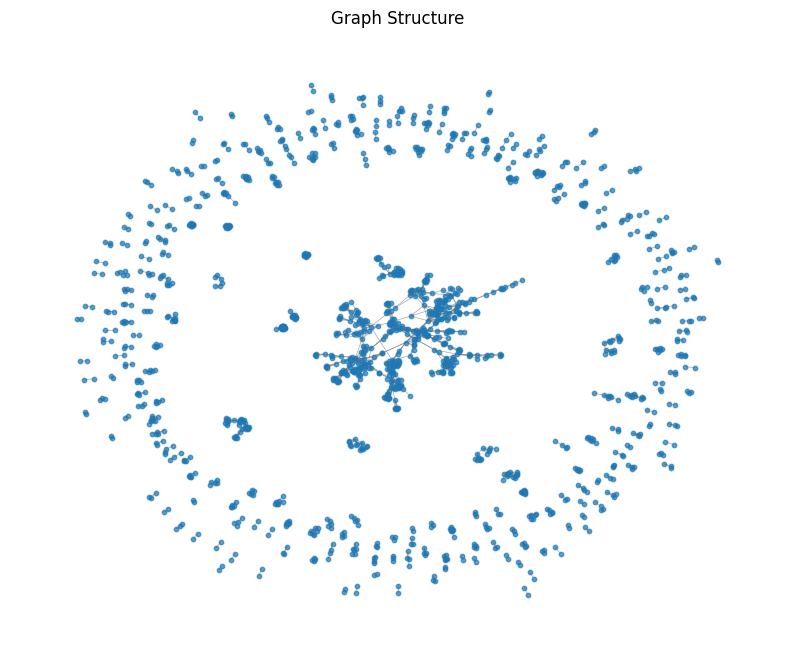

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis explicitly
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, ax=ax, node_size=10, edge_color="gray", alpha=0.7, width=0.5)  
plt.title("Graph Structure")  
plt.show()

In [16]:
# ------------------------- Centrality Measures ------------------------- #
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
pagerank_centrality = nx.pagerank(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

/Users/harshil/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1034: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/harshil/anaconda3/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


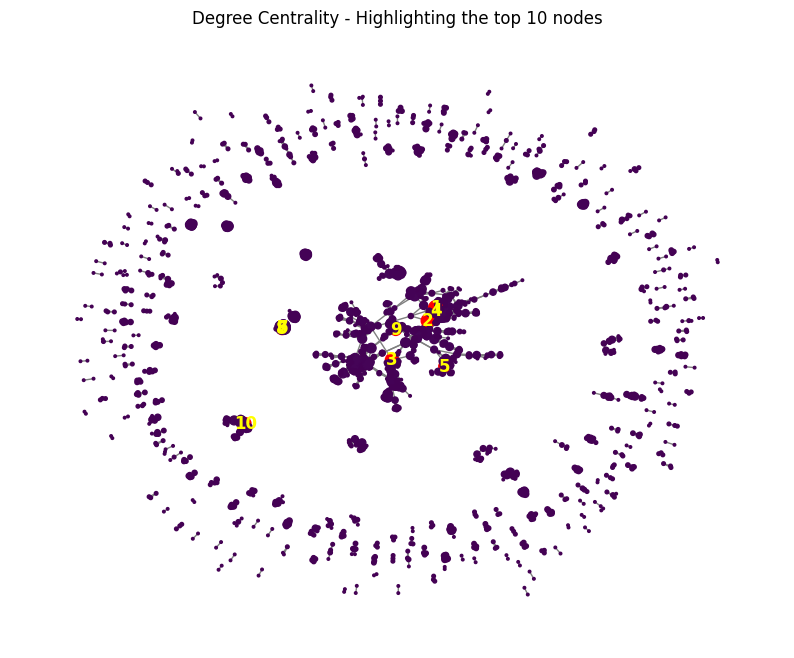


                                     Degree Centrality Analysis                                     
+--------+--------+----------+---------------------+  +----------------+--------------+
|   Rank |   Node |   Degree |   Degree Centrality |  | Degree Range   |   Node Count |
+========+========+==========+=====================+  +================+==============+
|      1 |     44 |       34 |              0.0233 |  | 0-7            |         1249 |
+--------+--------+----------+---------------------+  +----------------+--------------+
|      2 |     45 |       27 |              0.0185 |  | 7-14           |          172 |
+--------+--------+----------+---------------------+  +----------------+--------------+
|      3 |    107 |       27 |              0.0185 |  | 14-21          |           36 |
+--------+--------+----------+---------------------+  +----------------+--------------+
|      4 |     46 |       21 |              0.0144 |  | 21-28          |            3 |
+--------+--------

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate


# Compute degree and degree centrality
degree_dict = dict(G.degree())  # Get actual degrees
degree_centrality = nx.degree_centrality(G)

# Get top 10 nodes by Degree Centrality
top_10_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]

# Convert top 10 data to table format
table_top_10 = [(i, node, degree_dict[node], round(degree_centrality[node], 4)) for i, node in enumerate(top_10_nodes, start=1)]
headers_top_10 = ["Rank", "Node", "Degree", "Degree Centrality"]

# Define Degree Ranges (0-7, 7-14, ..., 28-35)
ranges = [(i, i + 7) for i in range(0, 36, 7)]
range_counts = {f"{low}-{high}": sum(1 for v in degree_dict.values() if low <= v < high) for low, high in ranges}

# Convert range data to table format
table_ranges = [(r, count) for r, count in range_counts.items()]
headers_ranges = ["Degree Range", "Node Count"]

# ------------------------- PLOT: Degree Centrality ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * degree_centrality[node] for node in G]  # Scale node size
node_colors = ["red" if node in top_10_nodes else plt.cm.viridis(degree_centrality[node]) for node in G]

# Draw the graph
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, edge_color="gray", cmap=plt.cm.viridis)

# Label the top 10 nodes in the graph with their ranks (1-10)
for i, node in enumerate(top_10_nodes, 1):
    x, y = pos[node]
    plt.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

# Add title
plt.title("Degree Centrality - Highlighting the top 10 nodes")
plt.show()

# ------------------------- PRINT TABLES ------------------------- #
table1 = tabulate(table_top_10, headers=headers_top_10, tablefmt="grid").split("\n")
table2 = tabulate(table_ranges, headers=headers_ranges, tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Degree Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(50) + "  " + row2)


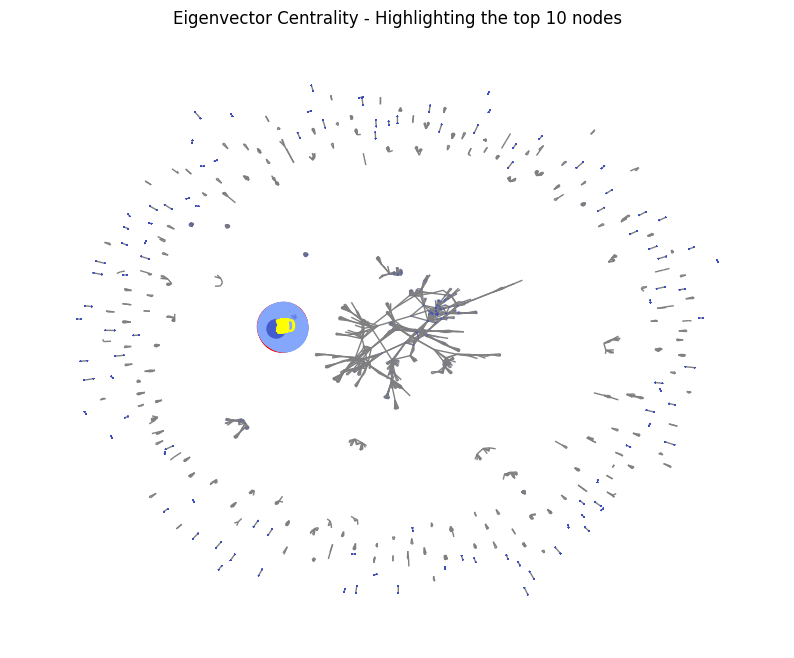


                                  Eigenvector Centrality Analysis                                   
+--------+--------+--------------------------+      +---------------------+--------------+
|   Rank |   Node |   Eigenvector Centrality |      | Eigenvector Range   |   Node Count |
+========+========+==========================+      +=====================+==============+
|      1 |    893 |                   0.225  |      | 0.00-0.05           |         1441 |
+--------+--------+--------------------------+      +---------------------+--------------+
|      2 |    894 |                   0.225  |      | 0.05-0.10           |            0 |
+--------+--------+--------------------------+      +---------------------+--------------+
|      3 |    895 |                   0.225  |      | 0.10-0.15           |            0 |
+--------+--------+--------------------------+      +---------------------+--------------+
|      4 |    892 |                   0.2232 |      | 0.15-0.20           |    

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Compute Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Get top 10 nodes by Eigenvector Centrality
top_10_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:10]

# Convert top 10 data to table format
table_top_10 = [(i, node, round(eigenvector_centrality[node], 4)) for i, node in enumerate(top_10_eigenvector, start=1)]
headers_top_10 = ["Rank", "Node", "Eigenvector Centrality"]

# Define Eigenvector Centrality Ranges (0.0-0.05, 0.05-0.1, ..., 0.2-0.25)
ranges = [(i / 20, (i + 1) / 20) for i in range(5)]  # [(0.0, 0.05), (0.05, 0.1), ...]
range_counts = {f"{low:.2f}-{high:.2f}": sum(1 for v in eigenvector_centrality.values() if low <= v < high) for low, high in ranges}

# Convert range data to table format
table_ranges = [(r, count) for r, count in range_counts.items()]
headers_ranges = ["Eigenvector Range", "Node Count"]

# ------------------------- PLOT: Eigenvector Centrality ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * eigenvector_centrality[node] for node in G]  # Scale node size
node_colors = ["red" if node in top_10_eigenvector else plt.cm.coolwarm(eigenvector_centrality[node]) for node in G]

# Draw the graph
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, edge_color="gray", cmap=plt.cm.coolwarm)

# Label the top 10 nodes in the graph with their ranks (1-10)
for i, node in enumerate(top_10_eigenvector, 1):
    x, y = pos[node]
    plt.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

# Add title
plt.title("Eigenvector Centrality - Highlighting the top 10 nodes")
plt.show()

# ------------------------- PRINT TABLES ------------------------- #
table1 = tabulate(table_top_10, headers=headers_top_10, tablefmt="grid").split("\n")
table2 = tabulate(table_ranges, headers=headers_ranges, tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Eigenvector Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(50) + "  " + row2)


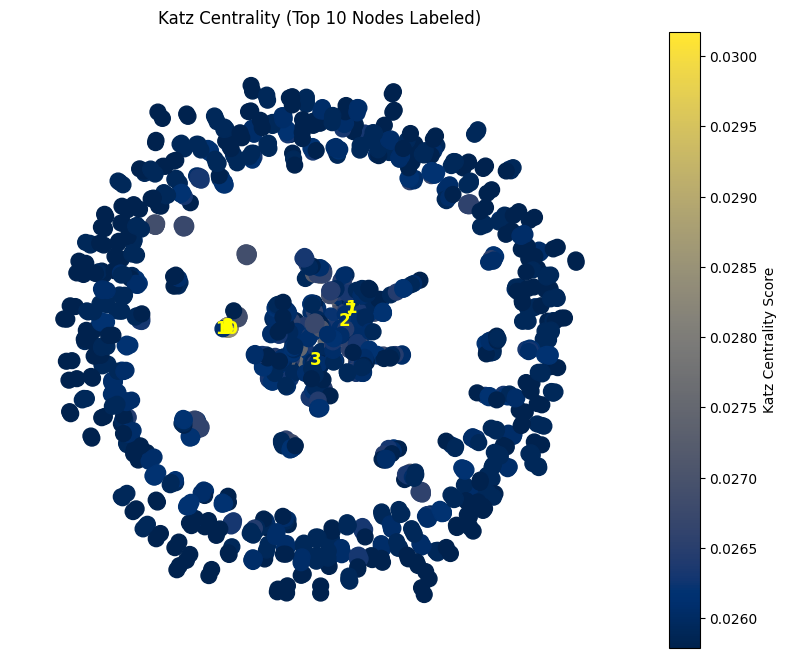


                                      Katz Centrality Analysis                                      
+--------+--------+----------+-------------------+            +-------------------------+--------------+
|   Rank |   Node |   Degree |   Katz Centrality |            | Katz Centrality Range   |   Node Count |
+========+========+==========+===================+            +=========================+==============+
|      1 |     44 |       34 |          0.030173 |            | 0.000 - 0.020           |            0 |
+--------+--------+----------+-------------------+            +-------------------------+--------------+
|      2 |     45 |       27 |          0.029277 |            | 0.020 - 0.025           |            0 |
+--------+--------+----------+-------------------+            +-------------------------+--------------+
|      3 |    107 |       27 |          0.029212 |            | 0.025 - 0.030           |         1460 |
+--------+--------+----------+-------------------+        

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

# Compute Katz Centrality
katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000, tol=1e-6, nstart={n: 1 for n in G.nodes()})
degrees = dict(G.degree())

# Get top 10 nodes by Katz Centrality
top_10_katz = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Rank, Node, Degree, Katz Centrality)
table_top_10 = [(i, node, degrees[node], round(centrality, 6)) for i, (node, centrality) in enumerate(top_10_katz, start=1)]
headers_top_10 = ["Rank", "Node", "Degree", "Katz Centrality"]

# Define custom Katz Centrality ranges
ranges = [(0.00, 0.02), (0.02, 0.025), (0.025, 0.03), (0.03, 0.04)]
range_counts = {f"{low:.3f} - {high:.3f}": sum(1 for v in katz_centrality.values() if low <= v < high) for low, high in ranges}
table_ranges = [(r, count) for r, count in range_counts.items()]
headers_ranges = ["Katz Centrality Range", "Node Count"]

# Create the figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the graph with node sizes based on Katz Centrality
node_sizes = [5000 * katz_centrality[node] for node in G]  # Scale node sizes
node_colors = list(katz_centrality.values())

nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.cividis, edge_color="gray")

# Label the top 10 nodes
for i, (node, _) in enumerate(top_10_katz, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

# Colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.cividis)
sm.set_array(list(katz_centrality.values()))
plt.colorbar(sm, ax=ax, label="Katz Centrality Score")

ax.set_title("Katz Centrality (Top 10 Nodes Labeled)")
plt.show()

# Convert tables to tabulated strings
table1 = tabulate(table_top_10, headers=headers_top_10, tablefmt="grid").split("\n")
table2 = tabulate(table_ranges, headers=headers_ranges, tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Katz Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)


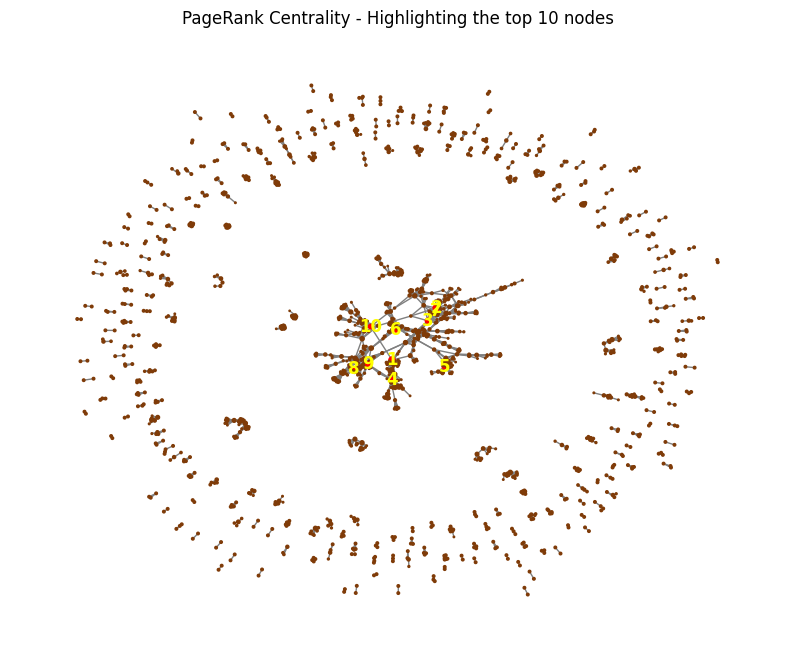


                                    PageRank Centrality Analysis                                    
+--------+--------+-----------------------+         +------------------+--------------+
|   Rank |   Node |   PageRank Centrality |         | PageRank Range   |   Node Count |
+========+========+=======================+         +==================+==============+
|      1 |    107 |              0.004191 |         | 0.0000-0.0005    |          250 |
+--------+--------+-----------------------+         +------------------+--------------+
|      2 |     44 |              0.003767 |         | 0.0005-0.0010    |         1099 |
+--------+--------+-----------------------+         +------------------+--------------+
|      3 |     45 |              0.002796 |         | 0.0010-0.0015    |           84 |
+--------+--------+-----------------------+         +------------------+--------------+
|      4 |    205 |              0.002387 |         | 0.0015-0.0020    |           21 |
+--------+--------

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Compute PageRank Centrality
pagerank_centrality = nx.pagerank(G)

# Get top 10 nodes by PageRank Centrality
top_10_pagerank = sorted(pagerank_centrality, key=pagerank_centrality.get, reverse=True)[:10]

# Convert top 10 data to table format
table_top_10 = [(i, node, round(pagerank_centrality[node], 6)) for i, node in enumerate(top_10_pagerank, start=1)]
headers_top_10 = ["Rank", "Node", "PageRank Centrality"]

# Define PageRank Centrality Ranges (0.0000-0.0005, 0.0005-0.001, ..., 0.004-0.0045)
ranges = [(i / 2000, (i + 1) / 2000) for i in range(9)]  # [(0.0000, 0.0005), (0.0005, 0.001), ...]
range_counts = {f"{low:.4f}-{high:.4f}": sum(1 for v in pagerank_centrality.values() if low <= v < high) for low, high in ranges}

# Convert range data to table format
table_ranges = [(r, count) for r, count in range_counts.items()]
headers_ranges = ["PageRank Range", "Node Count"]

# ------------------------- PLOT: PageRank Centrality ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * pagerank_centrality[node] for node in G]  # Scale node size
node_colors = ["red" if node in top_10_pagerank else plt.cm.PuOr(pagerank_centrality[node]) for node in G]

# Draw the graph
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, edge_color="gray", cmap=plt.cm.PuOr)

# Label the top 10 nodes in the graph with their ranks (1-10)
for i, node in enumerate(top_10_pagerank, 1):
    x, y = pos[node]
    plt.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

# Add title
plt.title("PageRank Centrality - Highlighting the top 10 nodes")
plt.show()

# ------------------------- PRINT TABLES ------------------------- #
table1 = tabulate(table_top_10, headers=headers_top_10, tablefmt="grid").split("\n")
table2 = tabulate(table_ranges, headers=headers_ranges, tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "PageRank Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(50) + "  " + row2)


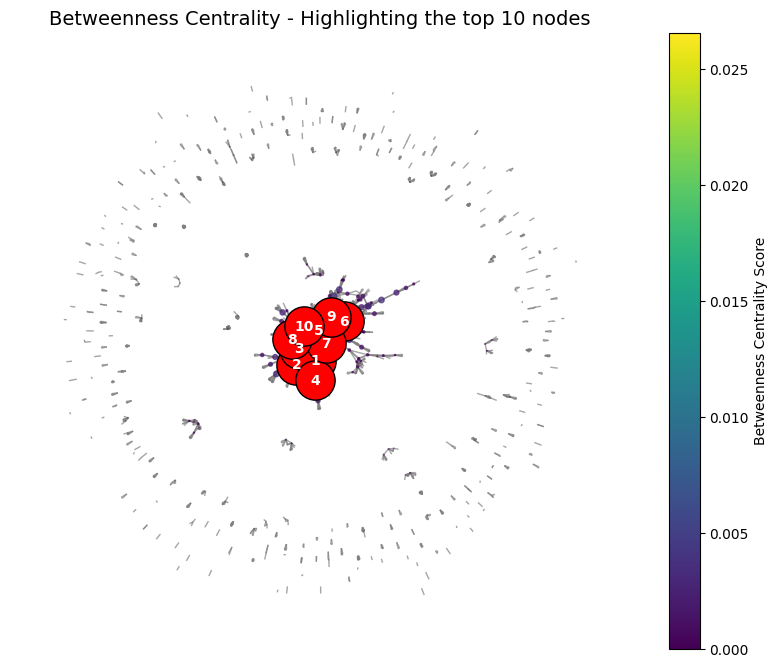


                                  Betweenness Centrality Analysis                                   
+--------+--------+--------------+                  +-------------+---------+
|   Rank |   Node |   Centrality |                  | Range       |   Count |
+========+========+==============+                  +=============+=========+
|      1 |    107 |       0.0266 |                  | 0.00 - 0.02 |    1459 |
+--------+--------+--------------+                  +-------------+---------+
|      2 |    185 |       0.0231 |                  | 0.02 - 0.04 |       2 |
+--------+--------+--------------+                  +-------------+---------+
|      3 |    329 |       0.0191 |                  | 0.04 - 0.06 |       0 |
+--------+--------+--------------+                  +-------------+---------+
|      4 |    205 |       0.0181 |                  | 0.06 - 0.08 |       0 |
+--------+--------+--------------+                  +-------------+---------+
|      5 |    121 |       0.0171 |      

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tabulate import tabulate

# Sort nodes by betweenness centrality in descending order
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Define Betweenness Ranges: 0.0 - 0.02, 0.02 - 0.04, ..., 0.1 - 0.14
range_bins = [(i / 100, (i + 2) / 100) for i in range(0, 12, 2)]
range_counts = {f"{low:.2f} - {high:.2f}": sum(1 for v in betweenness_centrality.values() if low <= v < high) for low, high in range_bins}

# ------------------------- PLOT: Betweenness Centrality ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis
pos = nx.spring_layout(G, seed=42)  # Graph layout

# Set node colors and sizes based on betweenness centrality
node_sizes = [5000 * betweenness_centrality[node] for node in G]
node_colors = list(betweenness_centrality.values())

# Draw the graph
nx.draw(
    G,
    pos,
    ax=ax,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.viridis,
    edge_color="gray",
    alpha=0.7
)

# Highlight top 10 nodes in red and number them 1-10
for i, (node, _) in enumerate(top_10_betweenness, 1):
    nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=[node], node_size=800, node_color="red", edgecolors="black")
    plt.text(pos[node][0], pos[node][1], str(i), fontsize=10, fontweight="bold", color="white", ha="center", va="center")

# Create a ScalarMappable for the colorbar
norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)  
cbar.set_label("Betweenness Centrality Score")

plt.title("Betweenness Centrality - Highlighting the top 10 nodes", fontsize=14)
plt.show()

# ------------------------- Print Tables Side by Side ------------------------- #
# Data for tables
top_10_table_data = [[i + 1, node, f"{betweenness_centrality[node]:.4f}"] for i, (node, _) in enumerate(top_10_betweenness)]
range_table_data = [[r, count] for r, count in range_counts.items()]

# Convert tables to string lists
table1 = tabulate(top_10_table_data, headers=["Rank", "Node", "Centrality"], tablefmt="grid").split("\n")
table2 = tabulate(range_table_data, headers=["Range", "Count"], tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Betweenness Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(50) + "  " + row2)


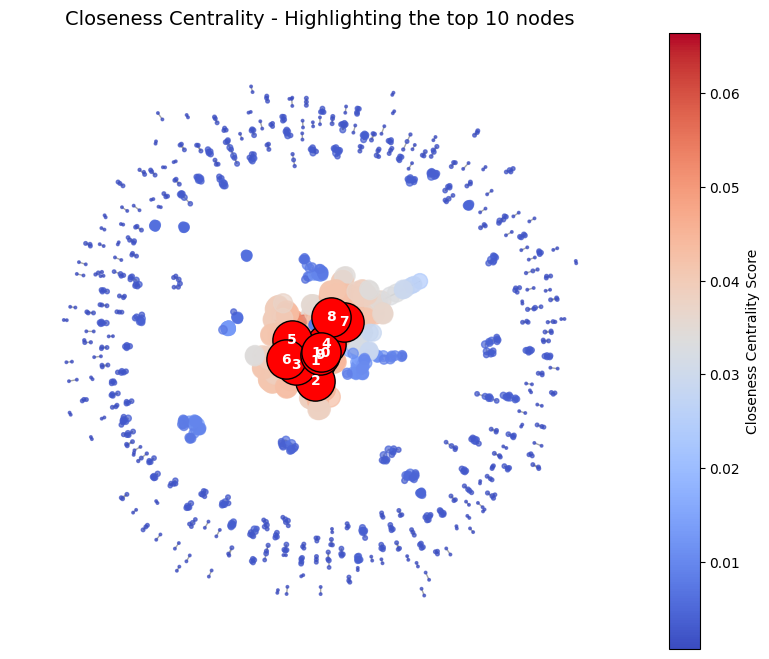


                                   Closeness Centrality Analysis                                    
+--------+--------+--------------+                  +-------------+---------+
|   Rank |   Node |   Centrality |                  | Range       |   Count |
+========+========+==============+                  +=============+=========+
|      1 |    107 |       0.0664 |                  | 0.00 - 0.02 |    1082 |
+--------+--------+--------------+                  +-------------+---------+
|      2 |    205 |       0.0645 |                  | 0.02 - 0.04 |     113 |
+--------+--------+--------------+                  +-------------+---------+
|      3 |    185 |       0.064  |                  | 0.04 - 0.06 |     261 |
+--------+--------+--------------+                  +-------------+---------+
|      4 |     85 |       0.0629 |                  | 0.06 - 0.08 |       5 |
+--------+--------+--------------+                  +-------------+---------+
|      5 |    327 |       0.0603 |      

In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tabulate import tabulate

# Sort nodes by closeness centrality in descending order
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Define Closeness Ranges: 0.0 - 0.02, 0.02 - 0.04, ..., 0.1 - 0.14
range_bins = [(i / 100, (i + 2) / 100) for i in range(0, 12, 2)]
range_counts = {f"{low:.2f} - {high:.2f}": sum(1 for v in closeness_centrality.values() if low <= v < high) for low, high in range_bins}

# ------------------------- PLOT: Closeness Centrality ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis
pos = nx.spring_layout(G, seed=42)  # Graph layout

# Set node colors and sizes based on closeness centrality
node_sizes = [5000 * closeness_centrality[node] for node in G]
node_colors = list(closeness_centrality.values())

# Draw the graph
nx.draw(
    G,
    pos,
    ax=ax,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    edge_color="gray",
    alpha=0.7
)

# Highlight top 10 nodes in red and number them 1-10
for i, (node, _) in enumerate(top_10_closeness, 1):
    nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=[node], node_size=800, node_color="red", edgecolors="black")
    plt.text(pos[node][0], pos[node][1], str(i), fontsize=10, fontweight="bold", color="white", ha="center", va="center")

# Create a ScalarMappable for the colorbar
norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)  
cbar.set_label("Closeness Centrality Score")

plt.title("Closeness Centrality - Highlighting the top 10 nodes", fontsize=14)
plt.show()

# ------------------------- Print Tables Side by Side ------------------------- #
# Data for tables
top_10_table_data = [[i + 1, node, f"{closeness_centrality[node]:.4f}"] for i, (node, _) in enumerate(top_10_closeness)]
range_table_data = [[r, count] for r, count in range_counts.items()]

# Convert tables to string lists
table1 = tabulate(top_10_table_data, headers=["Rank", "Node", "Centrality"], tablefmt="grid").split("\n")
table2 = tabulate(range_table_data, headers=["Range", "Count"], tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Closeness Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(50) + "  " + row2)


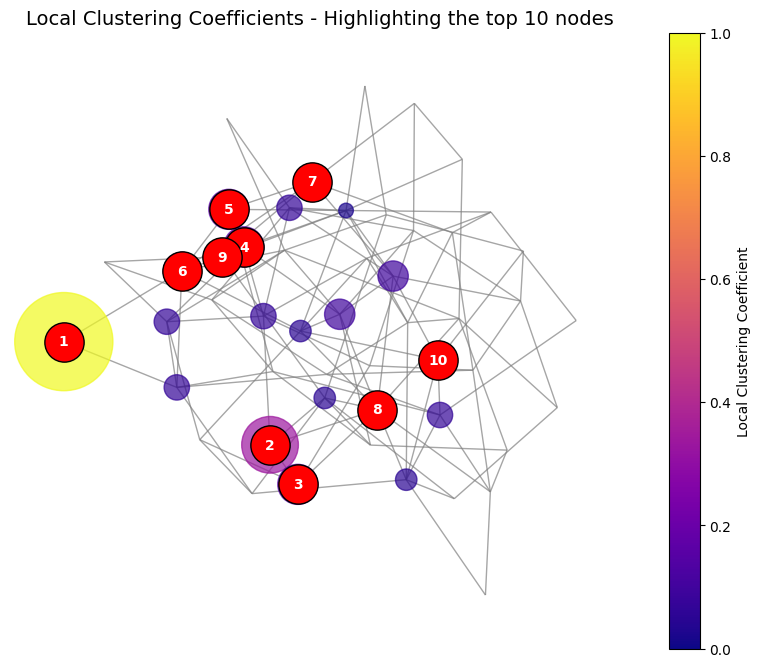


                               Local Clustering Coefficient Analysis                                
+--------+--------+--------------------------+      +--------------------+--------------+
|   Rank |   Node |   Clustering Coefficient |      | Clustering Range   |   Node Count |
+========+========+==========================+      +====================+==============+
|      1 |     21 |                 1        |      | 0.0-0.1            |           40 |
+--------+--------+--------------------------+      +--------------------+--------------+
|      2 |      8 |                 0.333333 |      | 0.1-0.2            |            8 |
+--------+--------+--------------------------+      +--------------------+--------------+
|      3 |     13 |                 0.166667 |      | 0.2-0.3            |            0 |
+--------+--------+--------------------------+      +--------------------+--------------+
|      4 |     31 |                 0.166667 |      | 0.3-1.0            |            1 

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tabulate import tabulate

# ------------------------- Clustering Coefficients ------------------------- #
G = nx.erdos_renyi_graph(50, 0.1, seed=42)  # Example graph
local_clustering = nx.clustering(G)

# Compute average local clustering coefficient
avg_local_clustering = np.mean(list(local_clustering.values()))

# Compute transitivity (global clustering coefficient)
transitivity = nx.transitivity(G)

# Sort nodes by clustering coefficient in descending order
top_10_clustering = sorted(local_clustering.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert top 10 data to table format
table_top_10 = [(i, node, round(local_clustering[node], 6)) for i, (node, _) in enumerate(top_10_clustering, start=1)]
headers_top_10 = ["Rank", "Node", "Clustering Coefficient"]

# Define Clustering Coefficient Ranges (0.0-0.1, 0.1-0.2, ..., 0.3-1.0)
ranges = [(i / 10, (i + 1) / 10) for i in range(3)] + [(0.3, 1.0)]  # [(0.0, 0.1), (0.1, 0.2), ..., (0.3, 1.0)]
range_counts = {f"{low:.1f}-{high:.1f}": sum(1 for v in local_clustering.values() if low <= v < high) for low, high in ranges}

# Convert range data to table format
table_ranges = [(r, count) for r, count in range_counts.items()]
headers_ranges = ["Clustering Range", "Node Count"]

# ------------------------- PLOT: Local Clustering Coefficients ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Set node colors and sizes based on clustering coefficient
node_colors = list(local_clustering.values())
node_sizes = [5000 * local_clustering[node] for node in G]

# Draw the graph
nx.draw(
    G,
    pos,
    ax=ax,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    edge_color="gray",
    alpha=0.7
)

# Highlight top 10 nodes in red and number them 1-10
for i, (node, _) in enumerate(top_10_clustering, 1):
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=800, node_color="red", edgecolors="black")
    plt.text(pos[node][0], pos[node][1], str(i), fontsize=10, fontweight="bold", color="white", ha="center", va="center")

# Create a ScalarMappable and set colorbar on the same axis
norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm)
sm.set_array([])  # Dummy array for colorbar
cbar = plt.colorbar(sm, ax=ax)  # Associate colorbar with axis
cbar.set_label("Local Clustering Coefficient")

plt.title("Local Clustering Coefficients - Highlighting the top 10 nodes", fontsize=14)
plt.show()

# ------------------------- PRINT TABLES ------------------------- #
table1 = tabulate(table_top_10, headers=headers_top_10, tablefmt="grid").split("\n")
table2 = tabulate(table_ranges, headers=headers_ranges, tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Local Clustering Coefficient Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(50) + "  " + row2)

print(f"\nAverage Local Clustering Coefficient: {avg_local_clustering:.4f}")


Global Clustering Coefficient (Transitivity): 0.0560


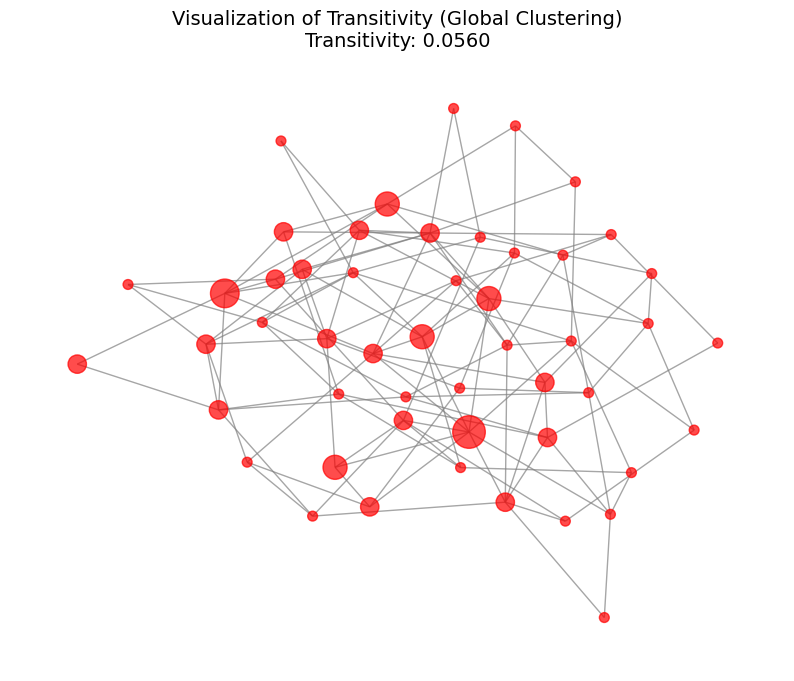

In [69]:
# Compute Transitivity (Global Clustering Coefficient)
transitivity = nx.transitivity(G)

print(f"Global Clustering Coefficient (Transitivity): {transitivity:.4f}")

triangle_counts = nx.triangles(G)

# Normalize triangle counts for visualization
max_triangles = max(triangle_counts.values()) if triangle_counts else 1
node_sizes = [50 + (500 * triangle_counts[n] / max_triangles) for n in G.nodes()]

# Draw the network with node size based on triangle participation
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis explicitly
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization

nx.draw(G, pos, ax, node_size=node_sizes, node_color="red", alpha=0.7, with_labels=False, edge_color="gray")

plt.title(f"Visualization of Transitivity (Global Clustering)\nTransitivity: {transitivity:.4f}", fontsize=14)
plt.show()


Total number of activated nodes: 61
Number of steps to reach maximum activation: 7
Step-by-step activation counts: [24, 12, 5, 7, 2, 1, 0]


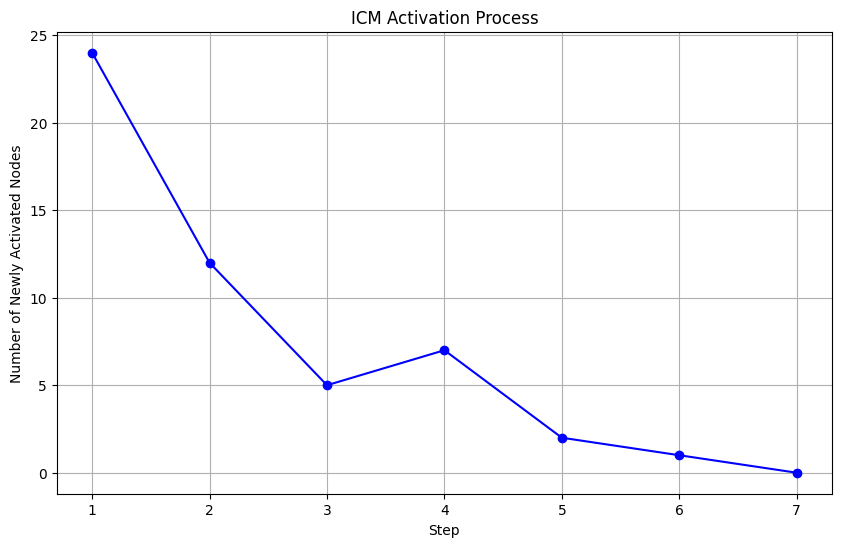

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Define the Independent Cascade Model function
def independent_cascade_model(G, seeds, prob=0.1, max_steps=None):
    """
    Simulates the Independent Cascade Model on a graph.
    
    Parameters:
        G (networkx.Graph): The input graph.
        seeds (list): List of initial seed nodes.
        prob (float): Probability of activation for each edge.
        max_steps (int): Maximum number of steps to run the simulation (optional).
    
    Returns:
        activated_nodes (set): Set of all activated nodes.
        step_counts (list): Number of newly activated nodes at each step.
        steps (int): Total number of steps taken to reach the maximum activation.
    """
    # Initialize variables
    activated_nodes = set(seeds)  # Nodes that are already activated
    newly_activated = set(seeds)  # Nodes activated in the current step
    step_counts = []  # Track the number of newly activated nodes at each step
    steps = 0  # Track the number of steps
    
    # Run the cascade process
    while newly_activated:
        steps += 1
        current_activations = set()  # Nodes activated in this step
        
        # Attempt to activate neighbors of newly activated nodes
        for node in newly_activated:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in activated_nodes:  # Only try to activate inactive nodes
                    if random.random() < prob:  # Activation succeeds with probability `prob`
                        current_activations.add(neighbor)
        
        # Update the sets of activated nodes
        newly_activated = current_activations
        activated_nodes.update(newly_activated)
        step_counts.append(len(newly_activated))
        
        # Stop if no new activations occur or if max_steps is reached
        if len(newly_activated) == 0 or (max_steps and steps >= max_steps):
            break
    
    return activated_nodes, step_counts, steps

# Step 2: Apply ICM to the network
# Define the seed nodes (e.g., top 10 nodes by degree centrality)
degree_centrality = nx.degree_centrality(G)
top_seeds = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
seeds = [node for node, _ in top_seeds]

# Run the ICM with a fixed activation probability (e.g., 0.1)
activated_nodes, step_counts, steps = independent_cascade_model(G, seeds, prob=0.1)

# Step 3: Print results
print(f"Total number of activated nodes: {len(activated_nodes)}")
print(f"Number of steps to reach maximum activation: {steps}")
print(f"Step-by-step activation counts: {step_counts}")

# Step 4: Visualize the activation process
plt.figure(figsize=(10, 6))
plt.plot(range(1, steps + 1), step_counts, marker='o', color='blue')
plt.title("ICM Activation Process")
plt.xlabel("Step")
plt.ylabel("Number of Newly Activated Nodes")
plt.grid(True)
plt.show()

Trial 1:
  Seed nodes: [949, 194, 1032, 626, 1389, 1422, 1300, 326, 895, 145]
  Total number of activated nodes: 29
  Number of steps to reach maximum activation: 6
Trial 2:
  Seed nodes: [1181, 947, 1060, 853, 18, 1051, 1403, 412, 86, 905]
  Total number of activated nodes: 30
  Number of steps to reach maximum activation: 5
Trial 3:
  Seed nodes: [484, 1132, 1338, 1129, 304, 540, 1458, 892, 1418, 1128]
  Total number of activated nodes: 11
  Number of steps to reach maximum activation: 2
Trial 4:
  Seed nodes: [976, 585, 1246, 1406, 1134, 1350, 440, 521, 101, 517]
  Total number of activated nodes: 15
  Number of steps to reach maximum activation: 2
Trial 5:
  Seed nodes: [1300, 992, 1280, 126, 1202, 35, 560, 261, 782, 70]
  Total number of activated nodes: 30
  Number of steps to reach maximum activation: 6

Summary of Results:
Average number of steps to reach maximum activation: 4.20
Average number of activated nodes: 23.00


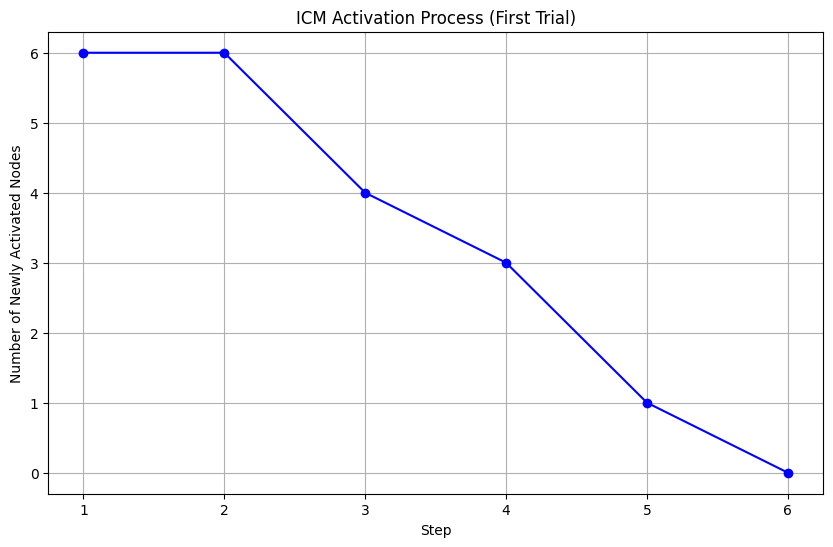

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Define the Independent Cascade Model function
def independent_cascade_model(G, seeds, prob=0.1, max_steps=None):
    """
    Simulates the Independent Cascade Model on a graph.
    
    Parameters:
        G (networkx.Graph): The input graph.
        seeds (list): List of initial seed nodes.
        prob (float): Probability of activation for each edge.
        max_steps (int): Maximum number of steps to run the simulation (optional).
    
    Returns:
        activated_nodes (set): Set of all activated nodes.
        step_counts (list): Number of newly activated nodes at each step.
        steps (int): Total number of steps taken to reach the maximum activation.
    """
    # Initialize variables
    activated_nodes = set(seeds)  # Nodes that are already activated
    newly_activated = set(seeds)  # Nodes activated in the current step
    step_counts = []  # Track the number of newly activated nodes at each step
    steps = 0  # Track the number of steps
    
    # Run the cascade process
    while newly_activated:
        steps += 1
        current_activations = set()  # Nodes activated in this step
        
        # Attempt to activate neighbors of newly activated nodes
        for node in newly_activated:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in activated_nodes:  # Only try to activate inactive nodes
                    if random.random() < prob:  # Activation succeeds with probability `prob`
                        current_activations.add(neighbor)
        
        # Update the sets of activated nodes
        newly_activated = current_activations
        activated_nodes.update(newly_activated)
        step_counts.append(len(newly_activated))
        
        # Stop if no new activations occur or if max_steps is reached
        if len(newly_activated) == 0 or (max_steps and steps >= max_steps):
            break
    
    return activated_nodes, step_counts, steps

# Step 2: Run ICM multiple times with different seed nodes
num_trials = 5  # Number of trials
activation_prob = 0.1  # Activation probability
steps_list = []  # To store the number of steps for each trial
activated_nodes_list = []  # To store the total number of activated nodes for each trial

for trial in range(num_trials):
    # Randomly select seed nodes for each trial
    seeds = random.sample(list(G.nodes()), 10)  # Select 10 random nodes as seeds
    
    # Run the ICM simulation
    activated_nodes, step_counts, steps = independent_cascade_model(G, seeds, prob=activation_prob)
    
    # Record results
    steps_list.append(steps)
    activated_nodes_list.append(len(activated_nodes))
    
    # Print results for the current trial
    print(f"Trial {trial + 1}:")
    print(f"  Seed nodes: {seeds}")
    print(f"  Total number of activated nodes: {len(activated_nodes)}")
    print(f"  Number of steps to reach maximum activation: {steps}")

# Step 3: Calculate and print the average results
average_steps = sum(steps_list) / num_trials
average_activated_nodes = sum(activated_nodes_list) / num_trials

print("\nSummary of Results:")
print(f"Average number of steps to reach maximum activation: {average_steps:.2f}")
print(f"Average number of activated nodes: {average_activated_nodes:.2f}")

# Step 4: Visualize the activation process for the first trial
plt.figure(figsize=(10, 6))
plt.plot(range(1, steps_list[0] + 1), step_counts, marker='o', color='blue')
plt.title("ICM Activation Process (First Trial)")
plt.xlabel("Step")
plt.ylabel("Number of Newly Activated Nodes")
plt.grid(True)
plt.show()